In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
df = pd.read_csv('./datasets/nyc-rolling-sales.csv')

display(df.head(3))
display(df.columns)
display(df.info())
display(df.describe())

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00


Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

None

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


## 1. Change values of `BOROUGH` to categories

In [3]:
df['BOROUGH'].unique()

array([1, 2, 3, 4, 5])

In [4]:
def change_values(x):
    if x == 1:
        return 'Manhattan'
    elif x == 2:
        return 'Bronx'
    elif x == 3:
        return 'Brooklyn'
    elif x == 4:
        return 'Queens'
    elif x == 5:
        return 'Staten Island'

df['BOROUGH'] = df['BOROUGH'].apply(change_values)

In [5]:
df['BOROUGH'].unique()

array(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

## 2. Missing values
- Remove rows that have missing values in `SALE PRICE` column.

In [6]:
df = df[df['SALE PRICE'].notnull()]

##  3. Duplicate values 
- Remove rows that have duplicates in all columns

In [7]:
df = df.drop_duplicates(subset=df.columns)

## 4. Filter Outliers
- quartile range should be between 0.10 and 0.90

#### Convert values

In [8]:
def str_to_float(x):
    try:
        return float(x)
    except:
        return float('nan')

df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].apply(str_to_float)
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].apply(str_to_float)

In [9]:
def int_to_str(x):
    try:
        return str(x)
    except:
        return str('No Value')

df['Unnamed: 0'] = df['Unnamed: 0'].apply(int_to_str)
df['BLOCK'] = df['BLOCK'].apply(int_to_str)
df['LOT'] = df['LOT'].apply(int_to_str)
df['ZIP CODE'] = df['ZIP CODE'].apply(int_to_str)

In [10]:
df = df.dropna()

#### Detect outliers

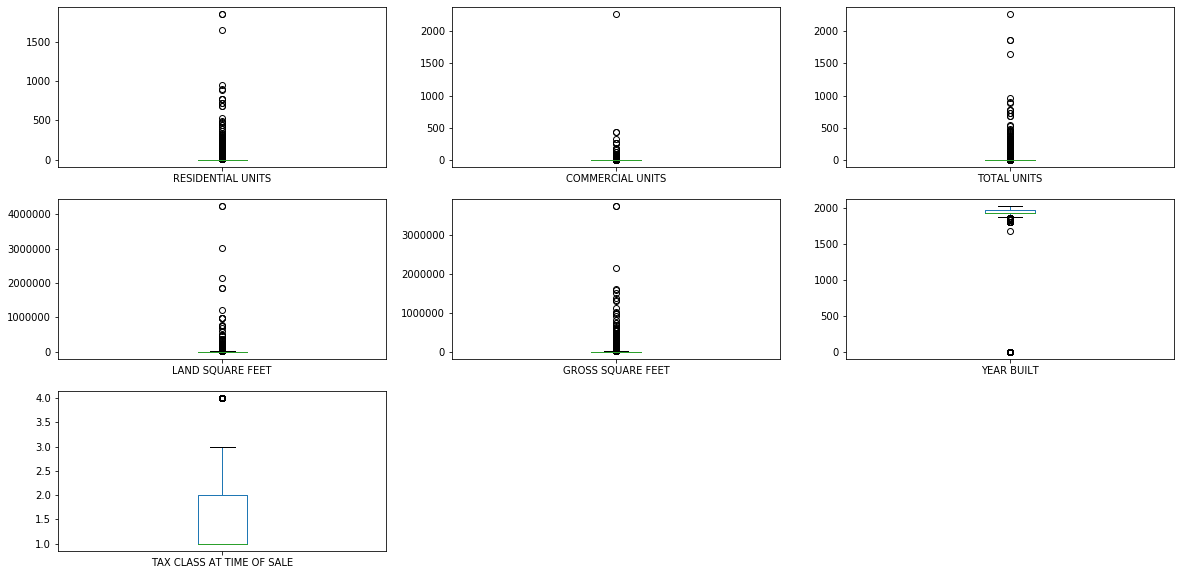

In [11]:
df.plot(
    kind = 'box',
    subplots = True,
    layout = (3,3),
    sharex = False, sharey=False,
    figsize=(20,10))
plt.show()

Columns affected by outliers: 
+ `RESIDENTIAL UNITS`
+ `COMMERCIAL UNITS`
+ `TOTAL UNITS`
+ `LAND SQUARE FEET`
+ `GROSS SQUARE FEET`
+ `YEAR BUILT`

#### Filter

In [12]:
# Retrieve only outlier columns
outlier_df = df[[
    'RESIDENTIAL UNITS',
    'COMMERCIAL UNITS',
    'TOTAL UNITS',
    'LAND SQUARE FEET',
    'GROSS SQUARE FEET',
    'YEAR BUILT']]

# find max and min using IQR
Q1 = outlier_df.quantile(0.10)
Q3 = outlier_df.quantile(0.90)
IQR = Q3-Q1
minimum = Q1 - 1.5*IQR
maximum = Q3 + 1.5*IQR

# Filter rows that have outliers
condition = ((outlier_df <= maximum) & (outlier_df >= minimum)) \
    .all(axis=1)
df = df[condition]

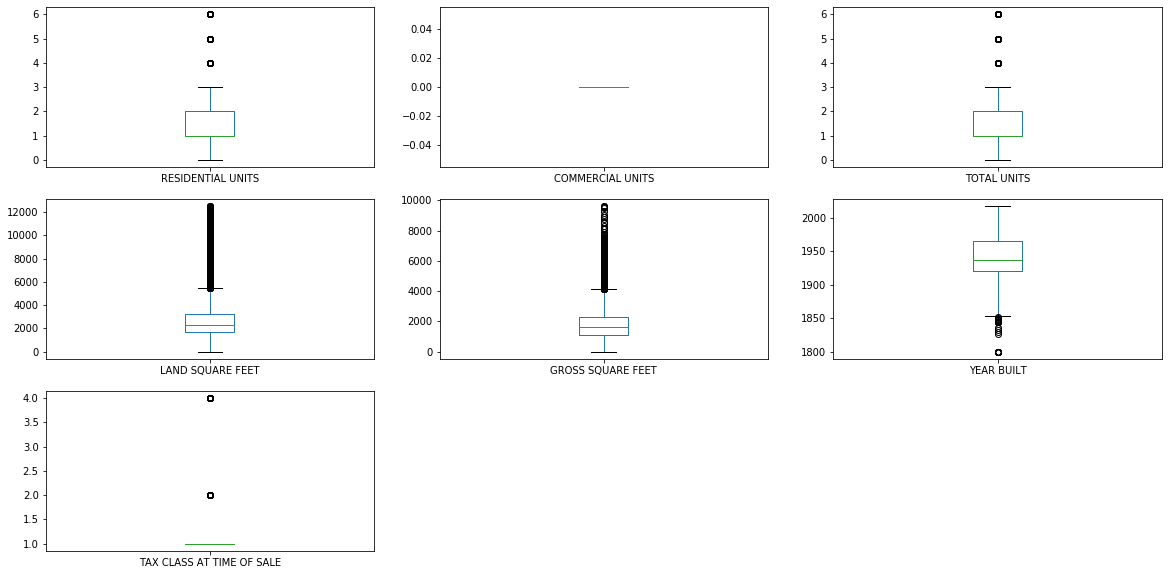

In [13]:
df.plot(
    kind = 'box',
    subplots = True,
    layout = (3,3),
    sharex = False, sharey=False,
    figsize=(20,10))
plt.show()